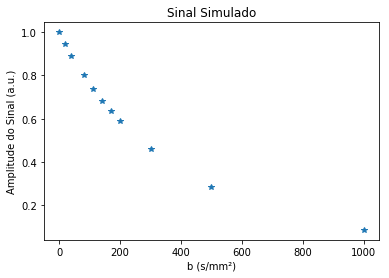

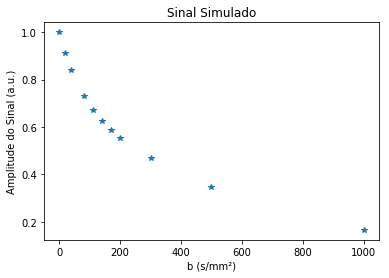

In [102]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

########################################
# Cérebro
# Saudável
#d = 0.832e-3
#de = 26.8e-3
#f = 0.115

# Com Tumor
#dT = 1.63e-3
#deT = 7.23e-3
#fT = 0.0953

########################################
# Renal
# Saudável
#d = 2.4e-3
#de = 11.1e-3
#f = 6.1e-2

# Com Lesão
#dT = 1.47e-3
#deT = 14.1e-3
#fT = 27.9e-2

########################################
# Fígado
# Saudável - Direito
#d = 1.16e-3
#de = 85.1e-3
#f = 0.26

# Cirrótico - Direito
#dT = 1.27e-3
#deT = 57.4e-3
#fT = 0.31

# Saudável - Esquerdo
#d = 1.02e-3
#de = 71e-3
#f = 0.31

# Cirrótico - Esquerdo
#dT = 1.04e-3
#deT = 64.7e-3
#fT = 0.29
########################################
# Teste
# Saudável
d = 2.4e-3
de = 11.1e-3
f = 6.1e-2

# Com Lesão
dT = 1.47e-3
deT = 14.1e-3
fT = 27.9e-2
########################################

#b = [0, 10, 20, 30, 40, 50, 100, 200, 400, 800]
b = [0, 20, 40, 80, 110, 140, 170, 200, 300, 500, 1000]

def plotCurve(d, de, f):
    sinalF = []
    for element in b:
        sinalF.append(f*np.exp(-element*de) + (1-f)*np.exp(-element*d))
    #plt.plot(b, sinal/sinal[0], ".-")
    plt.plot(b, sinalF/sinalF[0], "*")
    plt.title('Sinal Simulado')
    plt.xlabel('b (s/mm²)')
    plt.ylabel('Amplitude do Sinal (a.u.)')
    plt.show()
    
def plotCurveR(d, de, f):
    sinalF = []
    for element in b:
        sinalF.append(f*np.exp(-element*de) + (1-f)*np.exp(-element*d))
    plt.plot(b, sinalF/sinalF[0], ".-")
    plt.plot(b, sinalR/sinalR[0], "*")
    plt.show()

random.seed()
a = random.gauss(0.6, 0.1)
    
sinal = []
for element in b:
    sinal.append(a*(f*np.exp(-element*de) + (1-f)*np.exp(-element*d)))
    
sinalT = []
for element in b:
    sinalT.append(a*(fT*np.exp(-element*deT) + (1-fT)*np.exp(-element*dT)))
    
sinal = sinal/sinal[0]
sinalT = sinalT/sinalT[0]
    
plotCurve(d, de, f)
plotCurve(dT, deT, fT)

# 0 Ruído

Riciano:  31.46454366699716


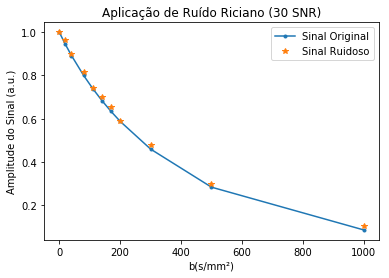

In [103]:
#Definição de SNR
SNRs = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
SNR = 30
meanSNR = 0

def getSNR(signal, noise):
    #mean = np.mean(signal)
    #sd = np.std(noise)
    sumS = 0
    sumN = 0
    for i in range(len(signal)):
        sumS += signal[i]*signal[i]
        sumN += noise[i]*noise[i]
    return (10*np.log10(sumS/sumN))

# Ruído Riciano
def createRiciT(SNR):
    global meanSNR
    sd = np.mean(sinalT)/(10**(SNR/(20*0.9)))
    
    noise = ((np.random.normal(0, sd, len(sinalT)))**2 + (np.random.normal(0, sd, len(sinalT)))**2)**0.5
    noise = np.absolute(noise)
    sinalR = sinalT + noise
    
    SNR = getSNR(sinalR, noise)
    meanSNR += SNR/1000
    #print(SNR)
    return sinalR

# Ruído Riciano
def createRici(SNR):
    global meanSNR
    sd = np.mean(sinal)/(10**(SNR/(20*0.9)))
    
    noise = ((np.random.normal(0, sd, len(sinal)))**2 + (np.random.normal(0, sd, len(sinal)))**2)**0.5
    noise = np.absolute(noise)
    sinalR = sinal + noise
    
    SNR = getSNR(sinalR, noise)
    meanSNR += SNR/1000
    #print(SNR)
    return sinalR

# Ruído Gaussiano
def createRui(SNR):
    global meanSNR
    sd = np.mean(sinal)/(10**(SNR/20))
    #print(sd)
    noise = np.random.normal(0, sd, len(sinal))
    sinalR = sinal + noise
    
    SNR = getSNR(sinalR, noise)
    #print(SNR)
    meanSNR += SNR/1000
    return sinalR

meanSNR = 0
for k in range(1000):
    sinalR1 = createRici(SNR)
print("Riciano: ",meanSNR)

meanSNR = 0
for k in range(1000):
    sinalR2 = createRui(SNR)
#print("Gaussiano: ", meanSNR)

plt.plot(b, sinal/sinal[0], ".-")
plt.plot(b, sinalR1/sinalR1[0], "*")
plt.title('Aplicação de Ruído Riciano (' + str(SNR) +' SNR)')
plt.xlabel('b(s/mm²)')
plt.ylabel('Amplitude do Sinal (a.u.)')
plt.gca().legend(('Sinal Original','Sinal Ruidoso'))
#pylab.legend(loc='upper right')

#plt.plot(b, sinalR2/sinalR2[0], "o")

# 1- Expansão em Fourier sem ruído

a0: 0.4946322518932102
a1: 0.0264992887536697
a2: 0.024776786444185617
a3: 0.029259624149271482
a4: 0.3421922808849606
b1: 0.020796933618382165
b2: 0.0783230972036506
b3: 0.18617971730599492
b4: 0.16516286779150838


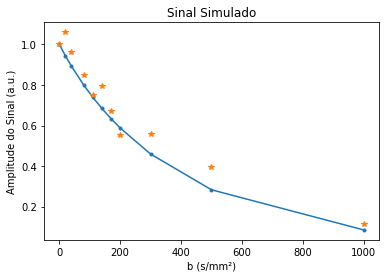

a0: 0.49859301120334587
a1: 0.02584500226706439
a2: 0.01931908619535971
a3: 0.009662370313579726
a4: 0.27315048821063054
b1: 0.02112211036041923
b2: 0.08075166426651371
b3: 0.18151350623390713
b4: 0.16109938376025162


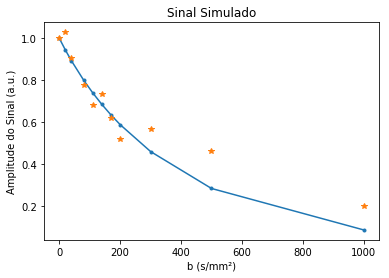

In [104]:
from lmfit import Minimizer, Parameters, report_fit

freq1 = 70
freq2 = freq1*2
freq3 = freq2*2
freq4 = freq3*2

def plotCurve3(a0, a1, a2, a3, a4, b1, b2, b3, b4):
    sinalF = []
    for x in b:
        sinalF.append( a0 + (a1)*np.sin(x * 2*np.pi/freq1) + (a2)*np.sin(x * 2*np.pi/freq2) + (a3)*np.sin(x * 2*np.pi/freq3) + a4*np.sin(x*2*np.pi/freq4) +
                      (b1)*np.cos(x * 2*np.pi/freq1) + (b2)*np.cos(x * 2*np.pi/freq2) + (b3)*np.cos(x * 2*np.pi/freq3) + b4*np.cos(x*2*np.pi/freq4))
    plt.plot(b, sinal/sinal[0], ".-")
    plt.plot(b, sinalF/sinalF[0], "*")
    plt.title('Sinal Simulado')
    plt.xlabel('b (s/mm²)')
    plt.ylabel('Amplitude do Sinal (a.u.)')
    plt.show()

def func5(params, x, data):
    a0 = params['a0']
    a1 = params['a1']
    a2 = params['a2']
    a3 = params['a3']
    a4 = params['a4']
    b1 = params['b1']
    b2 = params['b2']
    b3 = params['b3']
    b4 = params['b4']
    model = (a0 + (a1)*np.sin(x * 2*np.pi/freq1) + (a2)*np.sin(x * 2*np.pi/freq2) + (a3)*np.sin(x * 2*np.pi/freq3) + (a4)*np.sin(x * 2*np.pi/freq4) +
             (b1)*np.cos(x * 2*np.pi/freq1) + (b2)*np.cos(x * 2*np.pi/freq2) + (b3)*np.cos(x * 2*np.pi/freq3) + (b4)*np.cos(x * 2*np.pi/freq4))
    return (model - data)

data = np.empty(0)
x = np.empty(0)

for i in range(0,11):
    data = np.append(data, sinal[i])
    x = np.append(x, b[i])

# Tem problematização na inicialização dos parametros    
params = Parameters()
params.add('a0', value=0)
params.add('a1', value=0)
params.add('a2', value=0)
params.add('a3', value=0)
params.add('a4', value=0)
params.add('b1', value=0)
params.add('b2', value=0)
params.add('b3', value=0)
params.add('b4', value=0)
    
minner = Minimizer(func5, params, fcn_args=(x, data))
estR = minner.minimize()
a0Est = abs(estR.params['a0'].value)
a1Est = abs(estR.params['a1'].value)
a2Est = abs(estR.params['a2'].value)
a3Est = abs(estR.params['a3'].value)
a4Est = abs(estR.params['a4'].value)
b1Est = abs(estR.params['b1'].value)
b2Est = abs(estR.params['b2'].value)
b3Est = abs(estR.params['b3'].value)
b4Est = abs(estR.params['b4'].value)

print("a0: " + str(a0Est))
print("a1: " + str(a1Est))
print("a2: " + str(a2Est))
print("a3: " + str(a3Est))
print("a4: " + str(a4Est))
print("b1: " + str(b1Est))
print("b2: " + str(b2Est))
print("b3: " + str(b3Est))
print("b4: " + str(b4Est))

# Curva original
#plotCurve(d, de, f)

# Curva obtida
plotCurve3(a0Est, a1Est, a2Est, a3Est, a4Est, b1Est, b2Est, b3Est, b4Est)

data = np.empty(0)
x = np.empty(0)

for i in range(0,11):
    data = np.append(data, sinalT[i])
    x = np.append(x, b[i])

# Tem problematização na inicialização dos parametros    
params = Parameters()
params.add('a0', value=0)
params.add('a1', value=0)
params.add('a2', value=0)
params.add('a3', value=0)
params.add('a4', value=0)
params.add('b1', value=0)
params.add('b2', value=0)
params.add('b3', value=0)
params.add('b4', value=0)
    
minner = Minimizer(func5, params, fcn_args=(x, data))
estR = minner.minimize()
a0Est = abs(estR.params['a0'].value)
a1Est = abs(estR.params['a1'].value)
a2Est = abs(estR.params['a2'].value)
a3Est = abs(estR.params['a3'].value)
a4Est = abs(estR.params['a4'].value)
b1Est = abs(estR.params['b1'].value)
b2Est = abs(estR.params['b2'].value)
b3Est = abs(estR.params['b3'].value)
b4Est = abs(estR.params['b4'].value)

print("a0: " + str(a0Est))
print("a1: " + str(a1Est))
print("a2: " + str(a2Est))
print("a3: " + str(a3Est))
print("a4: " + str(a4Est))
print("b1: " + str(b1Est))
print("b2: " + str(b2Est))
print("b3: " + str(b3Est))
print("b4: " + str(b4Est))

# Curva original
#plotCurve(d, de, f)

# Curva obtida
plotCurve3(a0Est, a1Est, a2Est, a3Est, a4Est, b1Est, b2Est, b3Est, b4Est)

# 3- Modelo com Ruído (Unitário)

Com SNR  25
a0: 0.5039391898763034
a1: 0.007920855558268249
a2: 0.019281425223856567
a3: 0.03244582485555074
a4: 0.3397515424776688
b1: 0.026227914238570273
b2: 0.06963802580311565
b3: 0.18812443383283187
b4: 0.15240836587956452


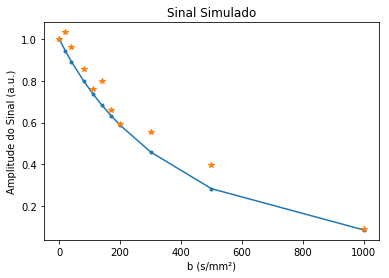

Com SNR  30
a0: 0.5032452148916017
a1: 0.025984339288706984
a2: 0.02748902234850335
a3: 0.030235895378411703
a4: 0.34144578437468864
b1: 0.024419217684208495
b2: 0.0773342072350283
b3: 0.18167470118383933
b4: 0.1621163621069681


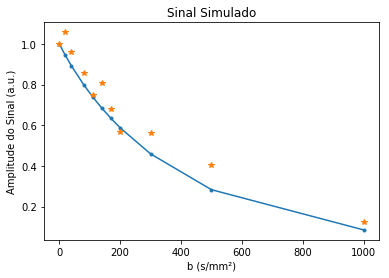

Com SNR  35
a0: 0.5022074282601316
a1: 0.022903982222653687
a2: 0.02569414454207586
a3: 0.027550226557544442
a4: 0.3416682765190598
b1: 0.021120010430796823
b2: 0.07609249750147778
b3: 0.18794174109006825
b4: 0.16604282976512424


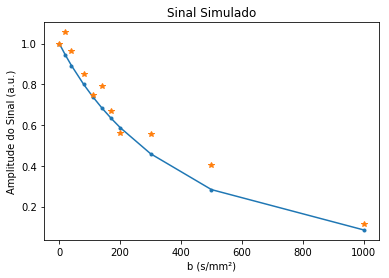

Com SNR  40
a0: 0.49863384667955735
a1: 0.029810562546598415
a2: 0.029265625310088694
a3: 0.03187515150756074
a4: 0.3385659118967112
b1: 0.023426681100252245
b2: 0.07455912379437937
b3: 0.18363190788650352
b4: 0.16561171125050986


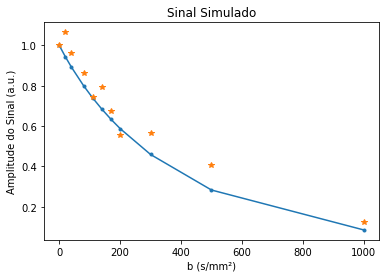

Com SNR  45
a0: 0.4957163135666238
a1: 0.02611729652243712
a2: 0.02485733311629214
a3: 0.028040482551072117
a4: 0.34276514258074414
b1: 0.02051312783099556
b2: 0.07774032397400402
b3: 0.1863183279968171
b4: 0.16544387634706037


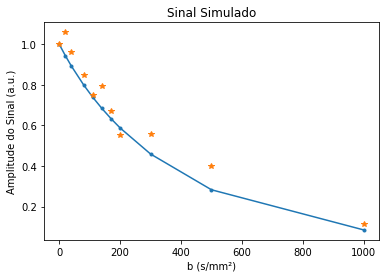

Com SNR  50
a0: 0.4949454695095862
a1: 0.02638570216917635
a2: 0.024755254383048153
a3: 0.02949040106354577
a4: 0.34136463132325795
b1: 0.021076935533708086
b2: 0.07834985955630716
b3: 0.18566938726068655
b4: 0.16511544654466598


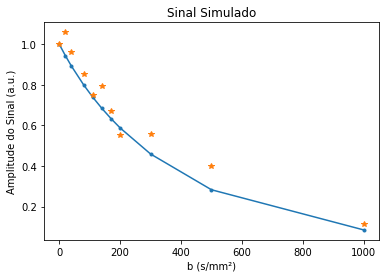

Com SNR  55
a0: 0.4946061497550983
a1: 0.026434845702555575
a2: 0.024713931770354663
a3: 0.028855438670776428
a4: 0.34207092589274873
b1: 0.020804318069185816
b2: 0.07836651188123266
b3: 0.18615637212084477
b4: 0.16520253816802594


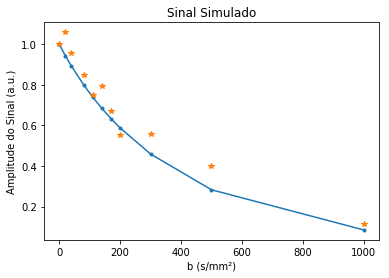

Com SNR  60
a0: 0.49479533733414677
a1: 0.02655802807564536
a2: 0.024645272116760188
a3: 0.029286832192525206
a4: 0.34194446802286166
b1: 0.02070330909239838
b2: 0.07834405798919485
b3: 0.18616697527194195
b4: 0.16511603495113764


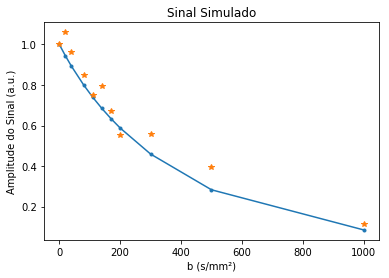

Com SNR  65
a0: 0.49458589280446175
a1: 0.026325742452026228
a2: 0.024821236417969916
a3: 0.029123878967801015
a4: 0.3423541099305526
b1: 0.020720678155843466
b2: 0.078346161949791
b3: 0.18624209373064374
b4: 0.16522664051892455


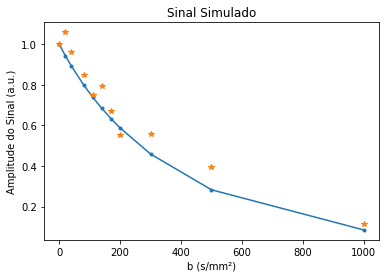

Com SNR  70
a0: 0.49461923322865337
a1: 0.02647439034859133
a2: 0.024782649761375942
a3: 0.029212685159839467
a4: 0.3422279633685037
b1: 0.02080120977109938
b2: 0.07833428495820612
b3: 0.18616323052717942
b4: 0.1651784843569154


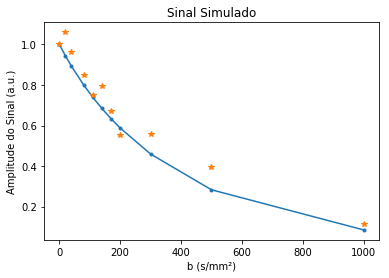

Com SNR  25
a0: 0.4927593432609561
a1: 0.018280723367676974
a2: 0.020064739575054853
a3: 0.012242820578263577
a4: 0.2836431778167416
b1: 0.033630251552306374
b2: 0.08437561052468155
b3: 0.17485719729054439
b4: 0.1665699072997205


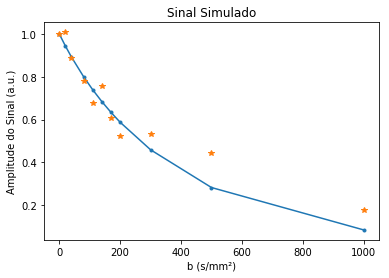

Com SNR  30
a0: 0.49990127847260685
a1: 0.0236004555914429
a2: 0.02473945000296606
a3: 0.00880515952030699
a4: 0.26727948842105287
b1: 0.029685405491461127
b2: 0.08326066168710398
b3: 0.16675736134747232
b4: 0.16411629261066776


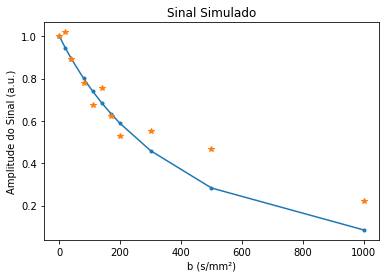

Com SNR  35
a0: 0.5035598818868156
a1: 0.020598455621918737
a2: 0.016977701875282535
a3: 0.008845693338462045
a4: 0.2758410981484197
b1: 0.017820305816977595
b2: 0.08009092154015188
b3: 0.18238086742842732
b4: 0.15748621680733121


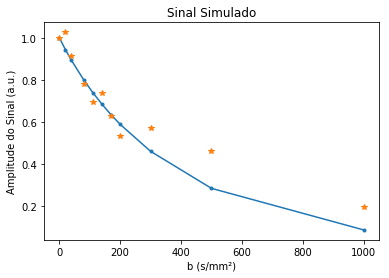

Com SNR  40
a0: 0.4982030890739598
a1: 0.02418282446005023
a2: 0.019106706276639476
a3: 0.008259206077781554
a4: 0.2718373954200712
b1: 0.02076209547130488
b2: 0.08170976939929842
b3: 0.1814538400206531
b4: 0.16043170570165577


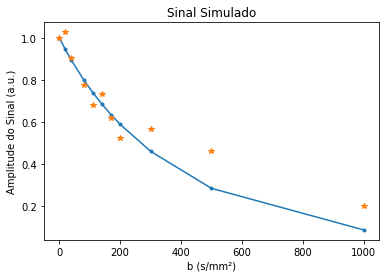

Com SNR  45
a0: 0.5008740615204618
a1: 0.02732108065866174
a2: 0.019077731132217605
a3: 0.010068297932515216
a4: 0.2699869551262368
b1: 0.021103016198059533
b2: 0.07987047023380454
b3: 0.18030095699597795
b4: 0.1610775512869269


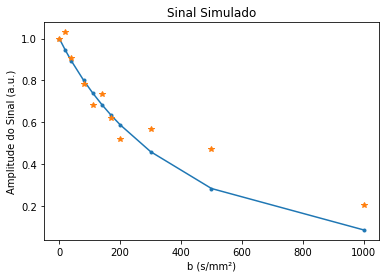

Com SNR  50
a0: 0.49920704780242736
a1: 0.0257677444100902
a2: 0.01880150385631818
a3: 0.009160488817448166
a4: 0.272748424315924
b1: 0.02075644486416103
b2: 0.08104607449915137
b3: 0.18183173113078288
b4: 0.16060405644922532


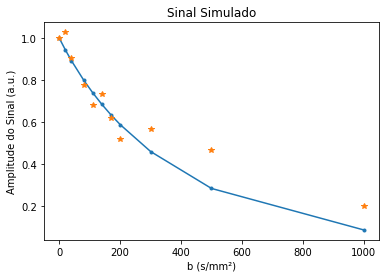

Com SNR  55
a0: 0.49933038941604363
a1: 0.025840866136976136
a2: 0.01936269718359996
a3: 0.009827907636446283
a4: 0.2726512337462226
b1: 0.021086912317515822
b2: 0.08032386700146502
b3: 0.1811564677504491
b4: 0.16110855017807227


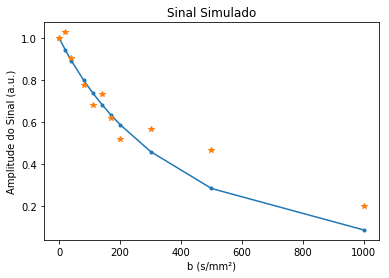

Com SNR  60
a0: 0.4987551252721534
a1: 0.025780231552949
a2: 0.019423023818241
a3: 0.009729295789569574
a4: 0.27299903273480514
b1: 0.02121144405505837
b2: 0.08067710106234677
b3: 0.18132659200134346
b4: 0.16114678917828995


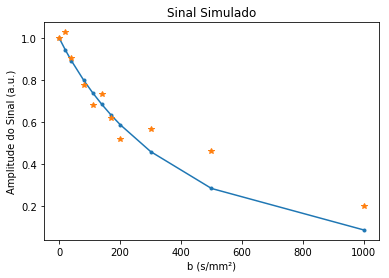

Com SNR  65
a0: 0.49884360068789263
a1: 0.02591254477928086
a2: 0.019380058726952958
a3: 0.009761861770548727
a4: 0.2729997950292371
b1: 0.021126012413869376
b2: 0.0807012274461087
b3: 0.181484390564073
b4: 0.16107029458091787


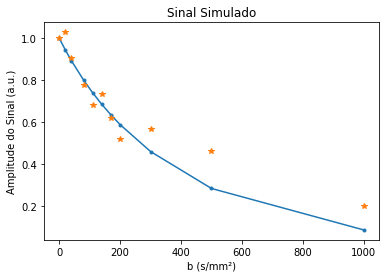

Com SNR  70
a0: 0.4985803202147883
a1: 0.02576903082010806
a2: 0.019347712662653102
a3: 0.009593729503591792
a4: 0.2732126835052247
b1: 0.021083535340306093
b2: 0.08075107304993473
b3: 0.18150325080254634
b4: 0.16114470034942577


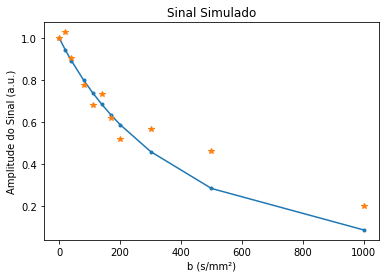

In [105]:
from lmfit import Minimizer, Parameters, report_fit

for SNR in SNRs[1:]:
    print("Com SNR ", SNR)
    data = np.empty(0)
    x = np.empty(0)

    sinalR = createRici(SNR)
    sinalR = sinalR/sinalR[0]
    
    for i in range(0,11):
        data = np.append(data, sinalR[i])
        x = np.append(x, b[i])

    params = Parameters()
    params.add('a0', value=0)
    params.add('a1', value=0)
    params.add('a2', value=0)
    params.add('a3', value=0)
    params.add('a4', value=0)
    params.add('b1', value=0)
    params.add('b2', value=0)
    params.add('b3', value=0)
    params.add('b4', value=0)

    minner = Minimizer(func5, params, fcn_args=(x, data))
    estR = minner.minimize()
    a0Est = abs(estR.params['a0'].value)
    a1Est = abs(estR.params['a1'].value)
    a2Est = abs(estR.params['a2'].value)
    a3Est = abs(estR.params['a3'].value)
    a4Est = abs(estR.params['a4'].value)
    b1Est = abs(estR.params['b1'].value)
    b2Est = abs(estR.params['b2'].value)
    b3Est = abs(estR.params['b3'].value)
    b4Est = abs(estR.params['b4'].value)

    print("a0: " + str(a0Est))
    print("a1: " + str(a1Est))
    print("a2: " + str(a2Est))
    print("a3: " + str(a3Est))
    print("a4: " + str(a4Est))
    print("b1: " + str(b1Est))
    print("b2: " + str(b2Est))
    print("b3: " + str(b3Est))
    print("b4: " + str(b4Est))

    # Curva obtida
    plotCurve3(a0Est, a1Est, a2Est, a3Est, a4Est, b1Est, b2Est, b3Est, b4Est)
    
for SNR in SNRs[1:]:
    print("Com SNR ", SNR)
    data = np.empty(0)
    x = np.empty(0)

    sinalR = createRiciT(SNR)
    sinalR = sinalR/sinalR[0]
    
    for i in range(0,11):
        data = np.append(data, sinalR[i])
        x = np.append(x, b[i])

    params = Parameters()
    params.add('a0', value=0)
    params.add('a1', value=0)
    params.add('a2', value=0)
    params.add('a3', value=0)
    params.add('a4', value=0)
    params.add('b1', value=0)
    params.add('b2', value=0)
    params.add('b3', value=0)
    params.add('b4', value=0)

    minner = Minimizer(func5, params, fcn_args=(x, data))
    estR = minner.minimize()
    a0Est = abs(estR.params['a0'].value)
    a1Est = abs(estR.params['a1'].value)
    a2Est = abs(estR.params['a2'].value)
    a3Est = abs(estR.params['a3'].value)
    a4Est = abs(estR.params['a4'].value)
    b1Est = abs(estR.params['b1'].value)
    b2Est = abs(estR.params['b2'].value)
    b3Est = abs(estR.params['b3'].value)
    b4Est = abs(estR.params['b4'].value)

    print("a0: " + str(a0Est))
    print("a1: " + str(a1Est))
    print("a2: " + str(a2Est))
    print("a3: " + str(a3Est))
    print("a4: " + str(a4Est))
    print("b1: " + str(b1Est))
    print("b2: " + str(b2Est))
    print("b3: " + str(b3Est))
    print("b4: " + str(b4Est))

    # Curva obtida
    plotCurve3(a0Est, a1Est, a2Est, a3Est, a4Est, b1Est, b2Est, b3Est, b4Est)

# 3- Modelo com Ruído (Estatístico)

In [106]:
erroVec3 = list()
a0prg = list()
a1prg = list()
a2prg = list()
a3prg = list()
a4prg = list()
b1prg = list()
b2prg = list()
b3prg = list()
b4prg = list()

d1prg = list()
de1prg = list()
f1prg = list()

execucoes = 100

for SNR in SNRs[1:]:
    a0pr = np.empty(0)
    a1pr = np.empty(0)
    a2pr = np.empty(0)
    a3pr = np.empty(0)
    a4pr = np.empty(0)
    b1pr = np.empty(0)
    b2pr = np.empty(0)
    b3pr = np.empty(0)
    b4pr = np.empty(0)
    
    d1pr = np.empty(0)
    de1pr = np.empty(0)
    f1pr = np.empty(0)

    errom = 0;
    k = 0
    nconv = 0
    success = True
    while (k <= execucoes):
        try:
            sinalR = createRici(SNR)
            sinalR = sinalR/sinalR[0]

            data = np.empty(0)
            x = np.empty(0)

            for i in range(0,11):
                data = np.append(data, sinalR[i])
                x = np.append(x, b[i])

            params = Parameters()
            params.add('a0', value=0)
            params.add('a1', value=0)
            params.add('a2', value=0)
            params.add('a3', value=0)
            params.add('a4', value=0)
            params.add('b1', value=0)
            params.add('b2', value=0)
            params.add('b3', value=0)
            params.add('b4', value=0)

            minner = Minimizer(func5, params, fcn_args=(x, data))
            # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
            estR = minner.minimize()
            a0Est = abs(estR.params['a0'].value)
            a1Est = abs(estR.params['a1'].value)
            a2Est = abs(estR.params['a2'].value)
            a3Est = abs(estR.params['a3'].value)
            a4Est = abs(estR.params['a4'].value)
            b1Est = abs(estR.params['b1'].value)
            b2Est = abs(estR.params['b2'].value)
            b3Est = abs(estR.params['b3'].value)
            b4Est = abs(estR.params['b4'].value)
            
            a0pr = np.append(a0pr, a0Est)
            a1pr = np.append(a1pr, a1Est)
            a2pr = np.append(a2pr, a2Est)
            a3pr = np.append(a3pr, a3Est)
            a4pr = np.append(a4pr, a4Est)
            b1pr = np.append(b1pr, b1Est)
            b2pr = np.append(b2pr, b2Est)
            b3pr = np.append(b3pr, b3Est)
            b4pr = np.append(b4pr, b4Est)
            
            b4 = b4Est
            b3 = b3Est
            a0 = a0Est
            a4 = a4Est
            
            # Cálculo de d com b4
            if (b4 < 0.1):
                dCal = b4/100
            else:
                dCal = b4/100 + 0.00036
            #print(dCal)

            # Cálculo de f com a0
            med = (0.58 + 0.7)/2
            fCal = (np.arctan((a0-med)*200) + 1.5)/3*(0.115-0.095) + 0.095

            # Cálculo de de com a4
            med = (0.22 + 0.33)/2
            deCal = (np.arctan((-a4+med)*200) + 1.5)/3*(0.0275-0.0075) + 0.0075
            
            
            d1pr = np.append(d1pr, dCal)
            de1pr = np.append(de1pr, deCal)
            f1pr = np.append(f1pr, fCal)

            k = k + 1
            # Calcular erro
            sinalPlot = []
            for x in b:
                sinalPlot.append( a0Est + (a1Est)*np.sin(x * 2*np.pi/freq1) + (a2Est)*np.sin(x * 2*np.pi/freq2) + (a3Est)*np.sin(x * 2*np.pi/freq3) + a4Est*np.sin(x*2*np.pi/freq4) +
                      (b1Est)*np.cos(x * 2*np.pi/freq1) + (b2Est)*np.cos(x * 2*np.pi/freq2) + (b3Est)*np.cos(x * 2*np.pi/freq3) + b4Est*np.cos(x*2*np.pi/freq4))
                
            erro = 0
            for i in range(len(sinal)):
                erro = erro + abs(sinal[i]-sinalPlot[i])
                
            errom = errom + erro/execucoes
            
        except:
            nconv = nconv + 1
            if(nconv > execucoes):
                print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                print("Execuções bem sucedidas: " + str(k))
                success = False;
                break

    a0prg.append(a0pr)
    a1prg.append(a1pr)
    a2prg.append(a2pr)
    a3prg.append(a3pr)
    a4prg.append(a4pr)
    b1prg.append(b1pr)
    b2prg.append(b2pr)
    b3prg.append(b3pr)
    b4prg.append(b4pr)
    
    d1prg.append(d1pr)
    de1prg.append(de1pr)
    f1prg.append(f1pr)
    print("Com SNR = ", SNR)

    if (success):
        erroVec3.append(errom)
        print("Erro: ", errom)

        print("1 - Parâmetro 'a0': Média ("+ str(np.mean(a0pr)) +")")
        print("2 - Parâmetro 'a1': Média ("+ str(np.mean(a1pr)) +")")
        print("3 - Parâmetro 'a2': Média ("+ str(np.mean(a2pr)) +")")
        print("4 - Parâmetro 'a3': Média ("+ str(np.mean(a3pr)) +")")
        print("4 - Parâmetro 'a4': Média ("+ str(np.mean(a4pr)) +")")
        print("5 - Parâmetro 'b1': Média ("+ str(np.mean(b1pr)) +")")
        print("6 - Parâmetro 'b2': Média ("+ str(np.mean(b2pr)) +")")
        print("7 - Parâmetro 'b3': Média ("+ str(np.mean(b3pr)) +")")
        print("8 - Parâmetro 'b4': Média ("+ str(np.mean(b4pr)) +")")
        
        print("9 - Parâmetro 'dCal': Médio ("+ str(np.median(d1pr)) +")")
        print("10 - Parâmetro 'fCal': Médio ("+ str(np.median(f1pr)) +")")
        print("11 - Parâmetro 'deCal': Médio ("+ str(np.mean(de1pr)) +")")

        print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")

Com SNR =  25
Erro:  0.5706215330508233
1 - Parâmetro 'a0': Média (0.509743449124089)
2 - Parâmetro 'a1': Média (0.025891756178085902)
3 - Parâmetro 'a2': Média (0.02453748456409569)
4 - Parâmetro 'a3': Média (0.02916678585593444)
4 - Parâmetro 'a4': Média (0.3309559940118083)
5 - Parâmetro 'b1': Média (0.021511723991840023)
6 - Parâmetro 'b2': Média (0.07574333200059484)
7 - Parâmetro 'b3': Média (0.17978796769146294)
8 - Parâmetro 'b4': Média (0.15998800216210246)
9 - Parâmetro 'dCal': Médio (0.001962905065559908)
10 - Parâmetro 'fCal': Médio (0.0947855986396728)
11 - Parâmetro 'deCal': Médio (0.007649571208037125)
Não houve convergência em 0.0% dos casos.
Com SNR =  30
Erro:  0.5338337918589532
1 - Parâmetro 'a0': Média (0.503421984495991)
2 - Parâmetro 'a1': Média (0.026963750350411216)
3 - Parâmetro 'a2': Média (0.024973711308245564)
4 - Parâmetro 'a3': Média (0.029294325562491688)
4 - Parâmetro 'a4': Média (0.3354649774188409)
5 - Parâmetro 'b1': Média (0.020803403540915342)
6 - 

In [107]:
erroVec3T = list()
a0prgT = list()
a1prgT = list()
a2prgT = list()
a3prgT = list()
a4prgT = list()
b1prgT = list()
b2prgT = list()
b3prgT = list()
b4prgT = list()

d1prgT = list()
de1prgT = list()
f1prgT = list()

execucoes = 100

for SNR in SNRs[1:]:
    a0pr = np.empty(0)
    a1pr = np.empty(0)
    a2pr = np.empty(0)
    a3pr = np.empty(0)
    a4pr = np.empty(0)
    b1pr = np.empty(0)
    b2pr = np.empty(0)
    b3pr = np.empty(0)
    b4pr = np.empty(0)
    
    d1pr = np.empty(0)
    de1pr = np.empty(0)
    f1pr = np.empty(0)

    errom = 0;
    k = 0
    nconv = 0
    success = True
    while (k <= execucoes):
        try:
            sinalR = createRiciT(SNR)
            sinalR = sinalR/sinalR[0]

            data = np.empty(0)
            x = np.empty(0)

            for i in range(0,11):
                data = np.append(data, sinalR[i])
                x = np.append(x, b[i])

            params = Parameters()
            params.add('a0', value=0)
            params.add('a1', value=0)
            params.add('a2', value=0)
            params.add('a3', value=0)
            params.add('a4', value=0)
            params.add('b1', value=0)
            params.add('b2', value=0)
            params.add('b3', value=0)
            params.add('b4', value=0)

            minner = Minimizer(func5, params, fcn_args=(x, data))
            # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
            estR = minner.minimize()
            a0Est = abs(estR.params['a0'].value)
            a1Est = abs(estR.params['a1'].value)
            a2Est = abs(estR.params['a2'].value)
            a3Est = abs(estR.params['a3'].value)
            a4Est = abs(estR.params['a4'].value)
            b1Est = abs(estR.params['b1'].value)
            b2Est = abs(estR.params['b2'].value)
            b3Est = abs(estR.params['b3'].value)
            b4Est = abs(estR.params['b4'].value)
            
            a0pr = np.append(a0pr, a0Est)
            a1pr = np.append(a1pr, a1Est)
            a2pr = np.append(a2pr, a2Est)
            a3pr = np.append(a3pr, a3Est)
            a4pr = np.append(a4pr, a4Est)
            b1pr = np.append(b1pr, b1Est)
            b2pr = np.append(b2pr, b2Est)
            b3pr = np.append(b3pr, b3Est)
            b4pr = np.append(b4pr, b4Est)
            
            b4 = b4Est
            b3 = b3Est
            a0 = a0Est
            a4 = a4Est
            
            # Cálculo de d com b4
            if (b4 < 0.1): #Saudável
                dCal = b4/100
            else:
                dCal = b4/100 + 0.00036
            #print(dCal)

            # Cálculo de f com a0
            med = (0.58 + 0.7)/2
            fCal = (np.arctan((a0-med)*200) + 1.5)/3*(0.115-0.095) + 0.095
            
            # Cálculo de de com a4
            med = (0.22 + 0.33)/2
            deCal = (np.arctan((-a4+med)*200) + 1.5)/3*(0.0275-0.0075) + 0.0075
            
            d1pr = np.append(d1pr, dCal)
            de1pr = np.append(de1pr, deCal)
            f1pr = np.append(f1pr, fCal)

            k = k + 1
            # Calcular erro
            sinalPlot = []
            for x in b:
                sinalPlot.append( a0Est + (a1Est)*np.sin(x * 2*np.pi/freq1) + (a2Est)*np.sin(x * 2*np.pi/freq2) + (a3Est)*np.sin(x * 2*np.pi/freq3) + a4Est*np.sin(x*2*np.pi/freq4) +
                      (b1Est)*np.cos(x * 2*np.pi/freq1) + (b2Est)*np.cos(x * 2*np.pi/freq2) + (b3Est)*np.cos(x * 2*np.pi/freq3) + b4Est*np.cos(x*2*np.pi/freq4))
                
            erro = 0
            for i in range(len(sinal)):
                erro = erro + abs(sinal[i]-sinalPlot[i])
                
            errom = errom + erro/execucoes
            
        except:
            nconv = nconv + 1
            if(nconv > execucoes):
                print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                print("Execuções bem sucedidas: " + str(k))
                success = False;
                break

    a0prgT.append(a0pr)
    a1prgT.append(a1pr)
    a2prgT.append(a2pr)
    a3prgT.append(a3pr)
    a4prgT.append(a4pr)
    b1prgT.append(b1pr)
    b2prgT.append(b2pr)
    b3prgT.append(b3pr)
    b4prgT.append(b4pr)
    
    d1prgT.append(d1pr)
    de1prgT.append(de1pr)
    f1prgT.append(f1pr)
    print("Com SNR = ", SNR)

    if (success):
        erroVec3T.append(errom)
        print("Erro: ", errom)

        print("1 - Parâmetro 'a0': Média ("+ str(np.mean(a0pr)) +")")
        print("2 - Parâmetro 'a1': Média ("+ str(np.mean(a1pr)) +")")
        print("3 - Parâmetro 'a2': Média ("+ str(np.mean(a2pr)) +")")
        print("4 - Parâmetro 'a3': Média ("+ str(np.mean(a3pr)) +")")
        print("4 - Parâmetro 'a4': Média ("+ str(np.mean(a4pr)) +")")
        print("5 - Parâmetro 'b1': Média ("+ str(np.mean(b1pr)) +")")
        print("6 - Parâmetro 'b2': Média ("+ str(np.mean(b2pr)) +")")
        print("7 - Parâmetro 'b3': Média ("+ str(np.mean(b3pr)) +")")
        print("8 - Parâmetro 'b4': Média ("+ str(np.mean(b4pr)) +")")
        
        print("9 - Parâmetro 'dCal': Médio ("+ str(np.mean(d1pr)) +")")
        print("10 - Parâmetro 'fCal': Médio ("+ str(np.mean(f1pr)) +")")
        print("11 - Parâmetro 'deCal': Médio ("+ str(np.mean(de1pr)) +")")

        print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")

Com SNR =  25
Erro:  0.7782342786151074
1 - Parâmetro 'a0': Média (0.5137956675957202)
2 - Parâmetro 'a1': Média (0.023546335285660313)
3 - Parâmetro 'a2': Média (0.018454669172245055)
4 - Parâmetro 'a3': Média (0.01060483503309284)
4 - Parâmetro 'a4': Média (0.26600107490831343)
5 - Parâmetro 'b1': Média (0.020892323343229775)
6 - Parâmetro 'b2': Média (0.07800270676926865)
7 - Parâmetro 'b3': Média (0.17545538839042202)
8 - Parâmetro 'b4': Média (0.1573996630055053)
9 - Parâmetro 'dCal': Médio (0.0019339966300550532)
10 - Parâmetro 'fCal': Médio (0.09479354067499127)
11 - Parâmetro 'deCal': Médio (0.021601317681230386)
Não houve convergência em 0.0% dos casos.
Com SNR =  30
Erro:  0.782583464914928
1 - Parâmetro 'a0': Média (0.5063674662064032)
2 - Parâmetro 'a1': Média (0.024406881688938713)
3 - Parâmetro 'a2': Média (0.019065523085820144)
4 - Parâmetro 'a3': Média (0.009637299488426109)
4 - Parâmetro 'a4': Média (0.2686250210080524)
5 - Parâmetro 'b1': Média (0.02126498653199076)
6

Upper and Lower Whiskers:  0.5039070076977454 0.5166605928629607
Upper and Lower Whiskers:  0.01934500865126449 0.03112811117405492
Upper and Lower Whiskers:  0.01800217962757379 0.02970608379611778
Upper and Lower Whiskers:  0.021816196426294128 0.03668394965187649
Upper and Lower Whiskers:  0.015586059629232337 0.02725272360716437
Upper and Lower Whiskers:  0.07177664893811408 0.08057482639636379
Upper and Lower Whiskers:  0.17491062934738819 0.18519570388528173
Upper and Lower Whiskers:  0.1551182838013463 0.16568530847056837
[0.5706215330508233, 0.5338337918589532, 0.5032881870117444, 0.4955882724527828, 0.48874979395636425, 0.4838697872124938, 0.48402659651097946, 0.4834505509940215, 0.48289404363031757, 0.4827514054368212]


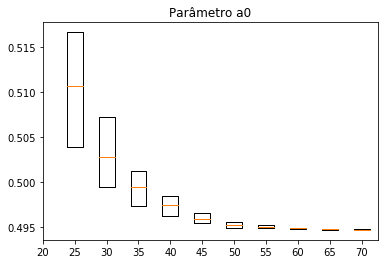

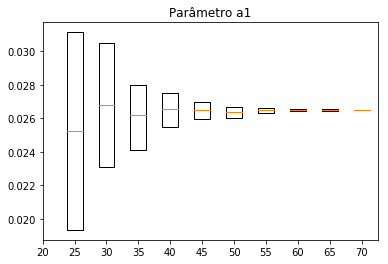

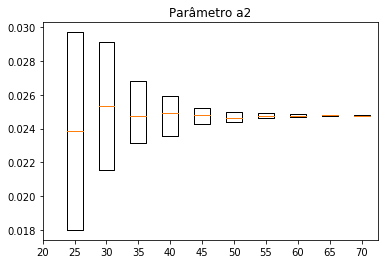

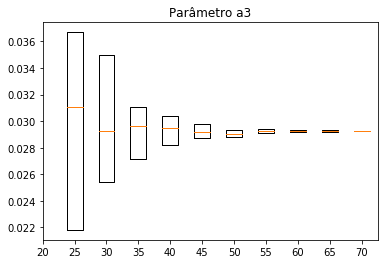

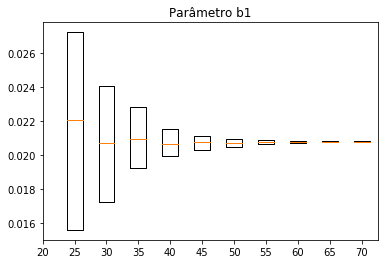

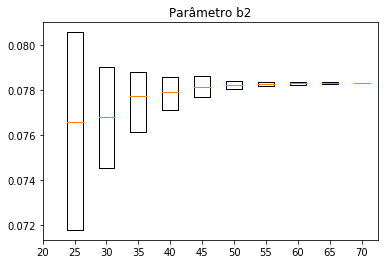

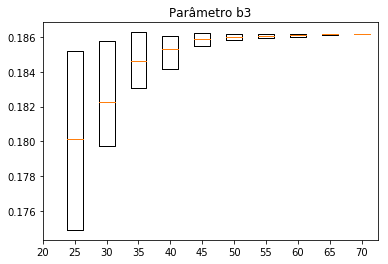

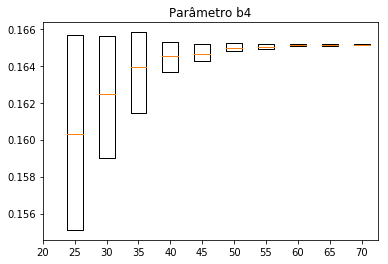

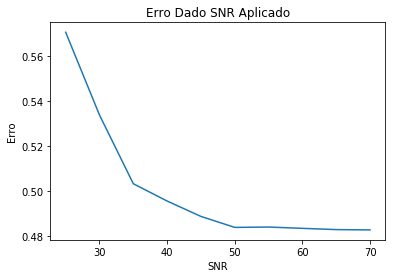

In [108]:
rangeMed = 100

# Parâmetros a

plt.figure()
bp = plt.boxplot(a0prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro a0')

plt.figure()
bp = plt.boxplot(a1prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro a1')

plt.figure()
bp = plt.boxplot(a2prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro a2')

plt.figure()
bp = plt.boxplot(a3prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro a3')

# Parâmetros b

plt.figure()
bp = plt.boxplot(b1prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro b1')

plt.figure()
bp = plt.boxplot(b2prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro b2')

plt.figure()
bp = plt.boxplot(b3prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro b3')

plt.figure()
bp = plt.boxplot(b4prg, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro b4')

plt.figure()
plt.plot(SNRs[1:], erroVec3)
plt.title('Erro Dado SNR Aplicado')
plt.xlabel('SNR')
plt.ylabel('Erro')
print(erroVec3)

Upper and Lower Whiskers:  0.5071683824170258 0.520280051417708
Upper and Lower Whiskers:  0.01785462890731845 0.02885057515391882
Upper and Lower Whiskers:  0.011418813209805957 0.025280726981340408
Upper and Lower Whiskers:  0.004953742263451377 0.014292372468692239
Upper and Lower Whiskers:  0.014573902968883222 0.027335808788868928
Upper and Lower Whiskers:  0.07368455788950101 0.08310221680238528
Upper and Lower Whiskers:  0.16910841798501275 0.18096533685298322
Upper and Lower Whiskers:  0.15013581813877167 0.16322316700775943
[0.7782342786151074, 0.782583464914928, 0.7809571702816915, 0.7806099005488104, 0.779546202533285, 0.7781961913377263, 0.7779458702022003, 0.777738842101125, 0.777685999147272, 0.7777047446885608]


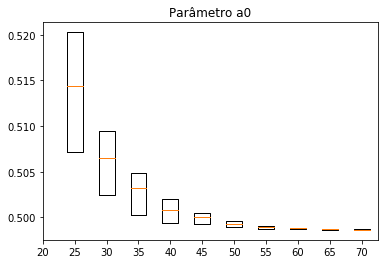

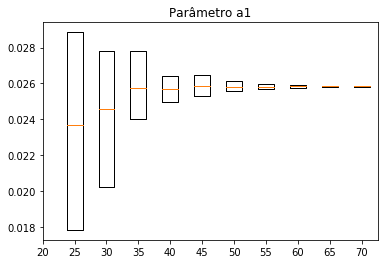

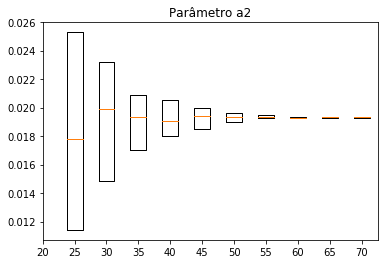

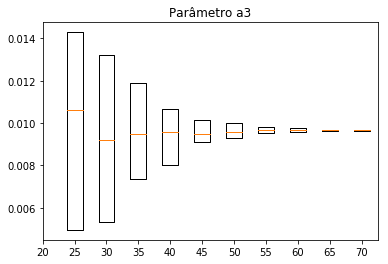

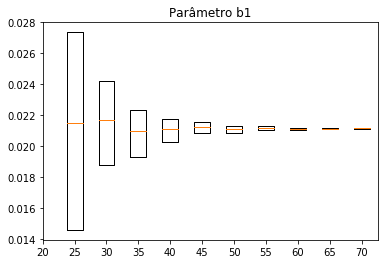

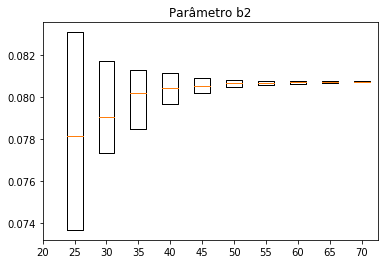

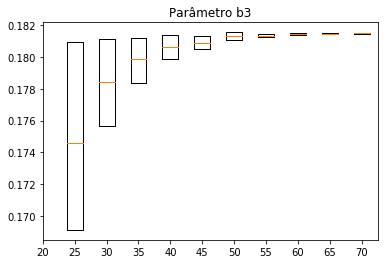

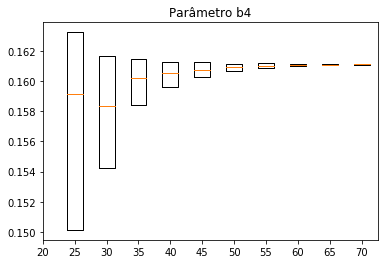

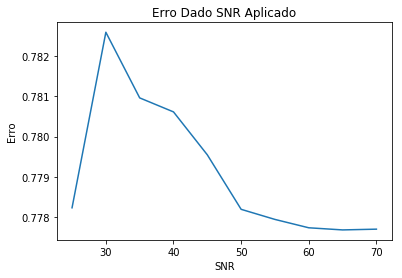

In [109]:
rangeMed = 100

# Parâmetros a

plt.figure()
bp = plt.boxplot(a0prgT, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro a0')

plt.figure()
bp = plt.boxplot(a1prgT, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro a1')

plt.figure()
bp = plt.boxplot(a2prgT, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro a2')

plt.figure()
bp = plt.boxplot(a3prgT, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro a3')

# Parâmetros b

plt.figure()
bp = plt.boxplot(b1prgT, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro b1')

plt.figure()
bp = plt.boxplot(b2prgT, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro b2')

plt.figure()
bp = plt.boxplot(b3prgT, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro b3')

plt.figure()
bp = plt.boxplot(b4prgT, showfliers=False, whis=0)
limits = [item.get_ydata() for item in bp['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([de for i in range(rangeMed)])
#plot = plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0, 0.05))
plt.xticks(range(len(SNRs)), SNRs)
plt.title('Parâmetro b4')

plt.figure()
plt.plot(SNRs[1:], erroVec3T)
plt.title('Erro Dado SNR Aplicado')
plt.xlabel('SNR')
plt.ylabel('Erro')
print(erroVec3T)

Upper and Lower Whiskers:  0.5071683824170258 0.520280051417708
Upper and Lower Whiskers:  0.01785462890731845 0.02885057515391882
Upper and Lower Whiskers:  0.011418813209805957 0.025280726981340408
Upper and Lower Whiskers:  0.004953742263451377 0.014292372468692239
Upper and Lower Whiskers:  0.2580248557154794 0.274974946778743
Upper and Lower Whiskers:  0.014573902968883222 0.027335808788868928
Upper and Lower Whiskers:  0.07368455788950101 0.08310221680238528
Upper and Lower Whiskers:  0.16910841798501275 0.18096533685298322
Upper and Lower Whiskers:  0.15013581813877167 0.16322316700775943


Text(0, 0.5, 'b4')

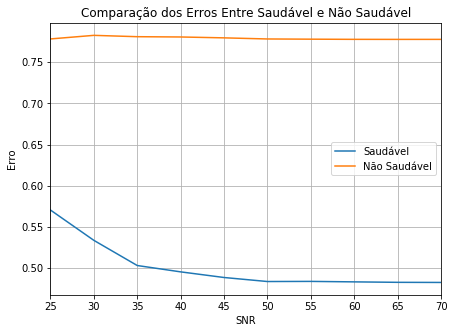

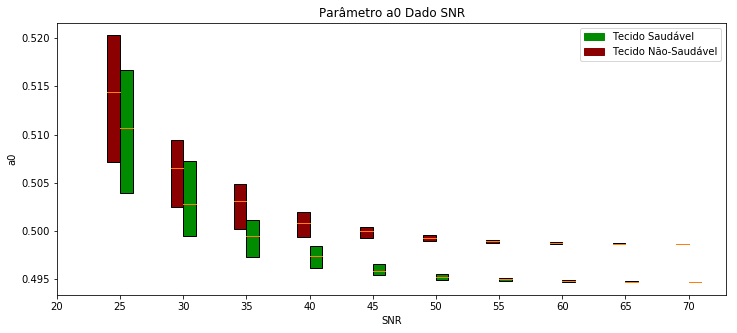

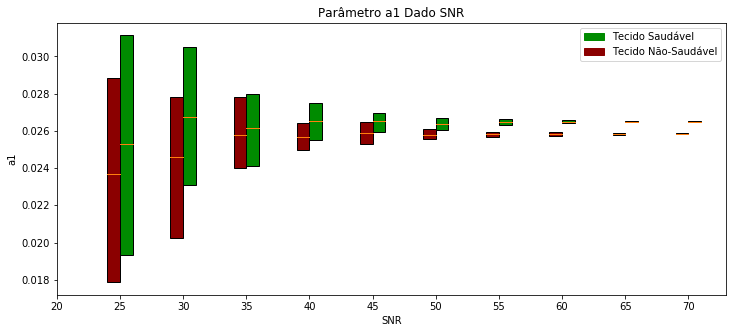

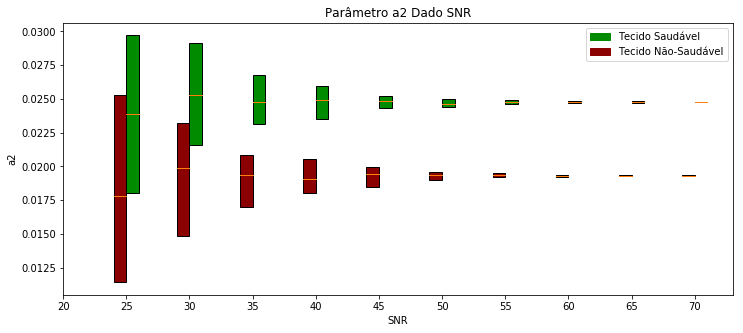

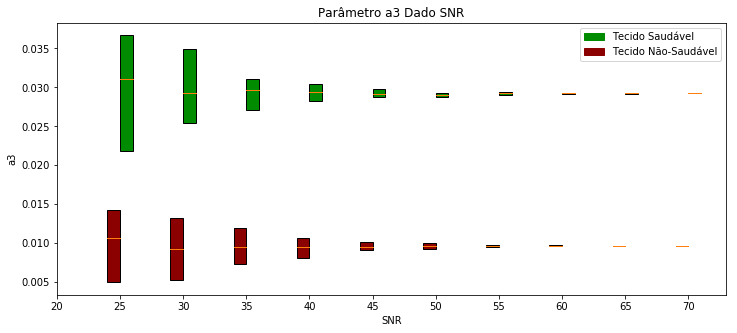

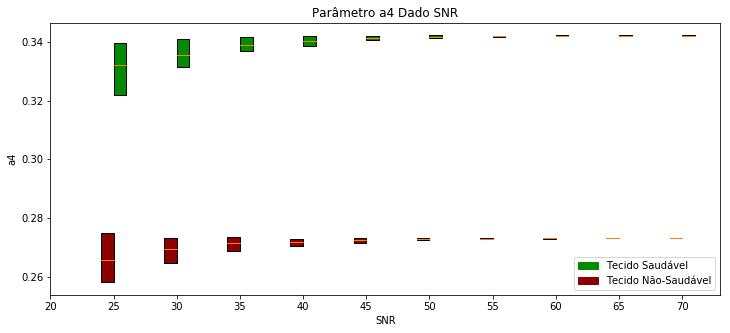

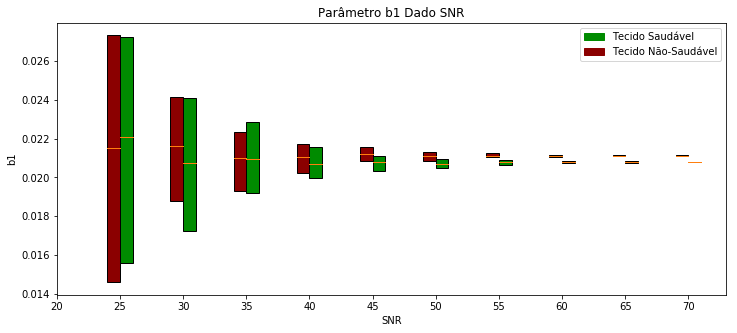

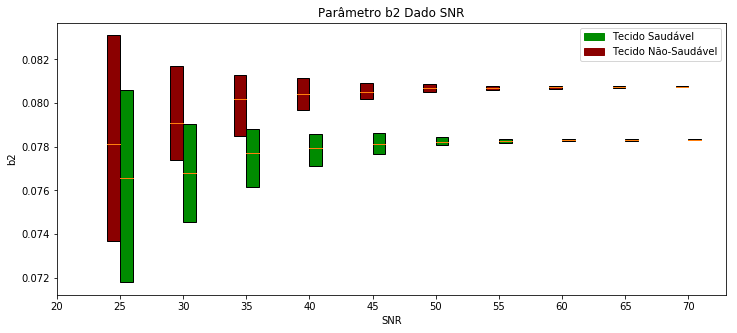

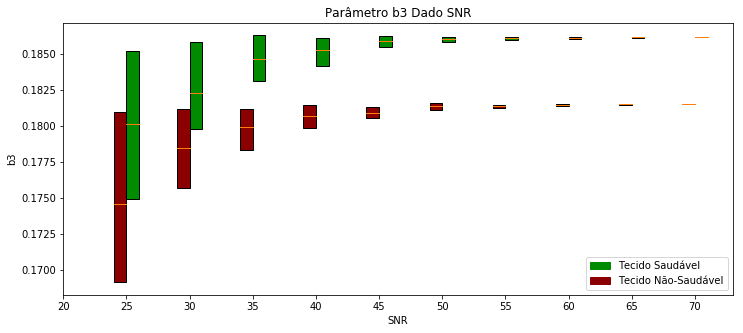

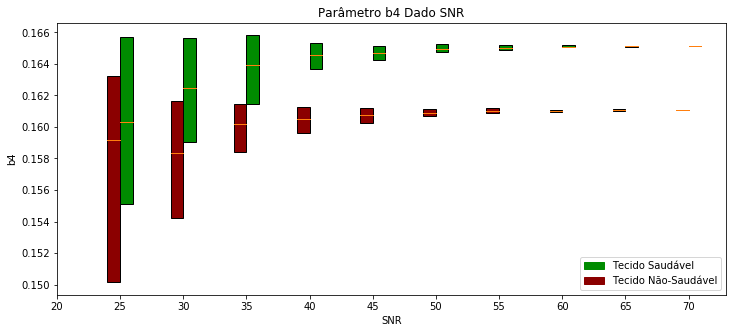

In [110]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

patch1 = mpatches.Patch(color='#008B00', label='Tecido Saudável')
patch2 = mpatches.Patch(color='#8B0000', label='Tecido Não-Saudável')
#patch3 = mpatches.Patch(color='#00008B', label='Fitting de 3 Parâmetros')

# Gráfico de erros

plt.figure(figsize=(7,5))
plt.plot(SNRs[1:], erroVec3)
plt.plot(SNRs[1:], erroVec3T)
plt.grid()
plt.xlim((25, 70))
#plt.ylim((0, 450))
plt.xlabel('SNR')
plt.ylabel('Erro')
plt.title('Comparação dos Erros Entre Saudável e Não Saudável')
plt.legend(['Saudável', 'Não Saudável'])

# Boxplots
# A0

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(a0prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(a0prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro a0 Dado SNR')
plt.xlabel('SNR')
plt.ylabel('a0')

# A1

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(a1prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(a1prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro a1 Dado SNR')
plt.xlabel('SNR')
plt.ylabel('a1')

# A2

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(a2prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(a2prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro a2 Dado SNR')
plt.xlabel('SNR')
plt.ylabel('a2')

# A3

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(a3prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(a3prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro a3 Dado SNR')
plt.xlabel('SNR')
plt.ylabel('a3')

# A4

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(a4prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(a4prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro a4 Dado SNR')
plt.xlabel('SNR')
plt.ylabel('a4')

# B1

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(b1prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(b1prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro b1 Dado SNR')
plt.xlabel('SNR')
plt.ylabel('b1')

# B2

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(b2prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(b2prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro b2 Dado SNR')
plt.xlabel('SNR')
plt.ylabel('b2')

# B3

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(b3prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(b3prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro b3 Dado SNR')
plt.xlabel('SNR')
plt.ylabel('b3')

# B4

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(b4prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(b4prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro b4 Dado SNR')
plt.xlabel('SNR')
plt.ylabel('b4')

Upper and Lower Whiskers:  0.0018613581813877167 0.0019922316700775942
Upper and Lower Whiskers:  0.017533404015457957 0.026062323734129148
Upper and Lower Whiskers:  0.09477885033848496 0.0948062903368622
0.001962905065559908
0.0019515500081088352
0.007610041409085117
0.024688562419922764
0.0947855986396728
0.09479325979358058


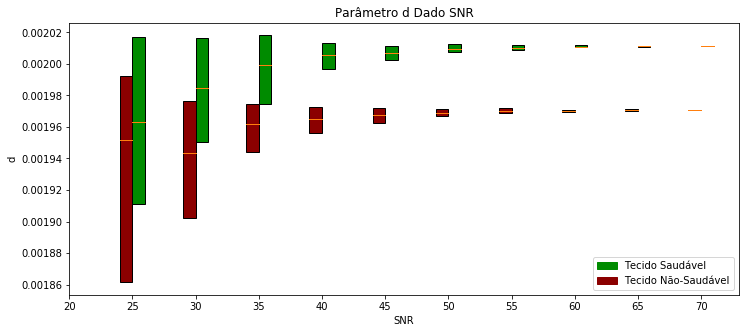

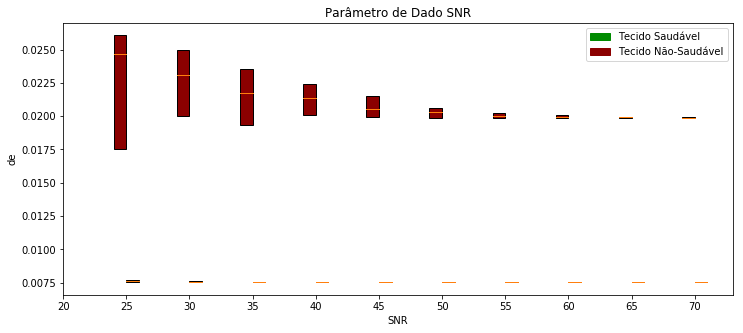

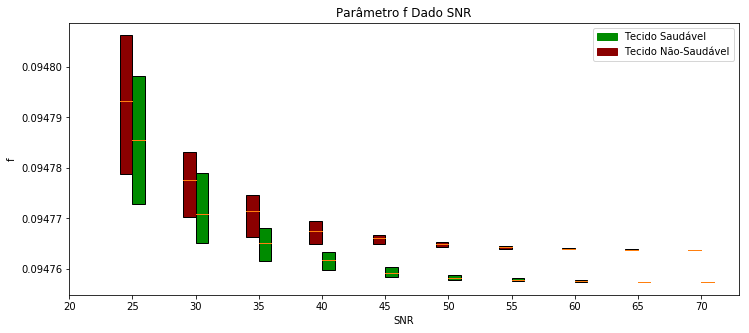

In [111]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

patch1 = mpatches.Patch(color='#008B00', label='Tecido Saudável')
patch2 = mpatches.Patch(color='#8B0000', label='Tecido Não-Saudável')
#patch3 = mpatches.Patch(color='#00008B', label='Fitting de 3 Parâmetros')

# Boxplots
# D

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(d1prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(d1prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro d Dado SNR')
plt.xlabel('SNR')
plt.ylabel('D(m²/s)')

# DE

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(de1prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(de1prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro de Dado SNR')
plt.xlabel('SNR')
plt.ylabel('D*(m²/s)')

# F

plt.figure(figsize=(12, 5))
bp1 = plt.boxplot(f1prgT, showfliers=False, whis=0, widths = 0.2, positions=[x-0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
bp2 = plt.boxplot(f1prg, showfliers=False, whis=0, widths = 0.2, positions=[x+0.1 for x in [1,2,3,4,5,6,7,8,9,10]], patch_artist=True)
limits = [item.get_ydata() for item in bp1['whiskers']]
print("Upper and Lower Whiskers: ",limits[0][0], limits[1][0])
#horiz_line_data = np.array([d for i in range(rangeMed)])
#plt.plot(range(rangeMed), horiz_line_data, 'r--')
#plt.ylim((0.5*10**-3, 1*10**-3))  #Saudável
#plt.ylim((1.0*10**-3, 1.8*10**-3)) #Tumor
plt.xticks(range(len(SNRs)), SNRs)

for box in bp1['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#8B0000')
for box in bp2['boxes']:
    box.set(color='black', linewidth=1)
    box.set(facecolor='#008B00')

plt.legend(handles=[patch1, patch2])
plt.title('Parâmetro f Dado SNR')
plt.xlabel('SNR')
plt.ylabel('f')

print(np.median(d1prg[0]))
print(np.median(d1prgT[0]))

print(np.median(de1prg[0]))
print(np.median(de1prgT[0]))

print(np.median(f1prg[0]))
print(np.median(f1prgT[0]))